In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt  #to show color based segmentation / histogram

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

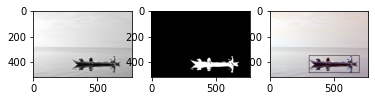

In [20]:
img = cv.imread("boat.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img_gray, (5, 5), 0)   
ret, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

img_copy = img.copy()
cv.rectangle(img_copy, (303,346), (692,480), (0,0,0), 2 , cv.LINE_AA)

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap = 'gray')

plt.subplot(1,3,2)
plt.imshow(th, cmap = 'gray')

plt.subplot(1,3,3)
plt.imshow(img_copy)

plt.show()

In [26]:
img1 = cv.imread("leaf.jfif", 0)

ret, img_binary = cv.threshold(img1, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

def trackbar(x):
    kernel = np.ones((x, x), dtype = np.uint8)
    img_erode = cv.erode(img_binary, kernel, iterations = 1) 
    cv.imshow('window', np.hstack([img_binary, img_erode]))

cv.namedWindow('window')
cv.createTrackbar('kernel', 'window',1,26, trackbar)
cv.waitKey(0)

-1

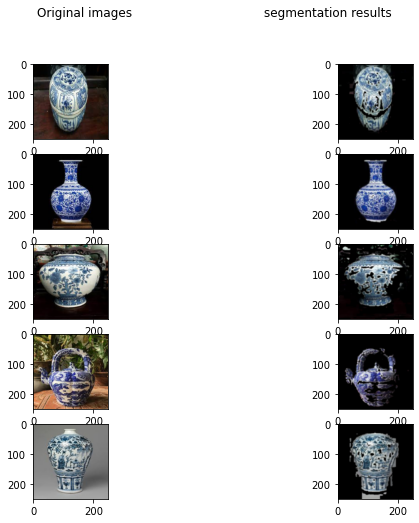

In [86]:
def segment_porcelain(img):
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #set the blue color range in hsv color space
    lower_blue = np.array([60, 1, 1])
    upper_blue = np.array([200, 256, 256])
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    res = cv.bitwise_and(img, img, mask = mask)

    blur = cv.GaussianBlur(res, (5, 5), 0)
    return blur

resize_dim = (250, 250)

porcelain_list = []
for i in range(1, 6):
    img_porcelain = cv.resize(cv.imread("porcelain"+ str(i) + ".jfif"), resize_dim)
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain_list.append(porcelain)

results = [segment_porcelain(porcelain) for porcelain in porcelain_list]
f, ax = plt.subplots(5, 2, figsize = (10, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])
    
f.suptitle("Original images                                  segmentation results")
plt.show()